In [1]:
# Data Preparation Libraries
import pandas as pd
import numpy as np
import datetime

# Plot and Visualisations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
%matplotlib inline

# Notebook settings
import warnings
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
warnings.filterwarnings('ignore')
import gc

# Modelling libraries
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [3]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#aici trebuie sa intro pe un link, sa alegi contul google si sa copiezi un cod pe care il pui in colab

In [4]:
link = 'https://drive.google.com/file/d/1Na3TmqqEluah4T-3hK2Zt1f25b-GbISE/view?usp=sharing' # linkul direct de la share

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]
filename= 'application_train.csv'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('application_train.csv')

In [5]:
link = 'https://drive.google.com/file/d/1fvhreMD4NKDRxjU7-yWI5w8tUI1Oxd_u/view?usp=sharing' # linkul direct de la share

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]
filename= 'application_test.csv'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('application_test.csv')

In [6]:
train = pd.read_csv('application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
test = pd.read_csv('application_test.csv')
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [8]:
train.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [9]:
categ_cols = train.select_dtypes(include='object').columns.to_list()
categ_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [10]:
for column in categ_cols:
    print(column, ' possible values are')
    print(train[column].value_counts(ascending=False, dropna=False))
    print()

NAME_CONTRACT_TYPE  possible values are
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER  possible values are
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR  possible values are
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY  possible values are
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE  possible values are
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: count, dtype: int64

NAME_INCOME_TYPE  possible values are
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman      

In [11]:
missing_values_table(train[categ_cols])

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4


### One Hot Encoding

One hot encoding, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation.

#### Advantages

- Straightforward to implement
- Makes no assumption
- Keeps all the information of the categorical variable

#### Disadvantages

- Does not add any information that may make the variable more predictive
- If the variable has loads of categories, then OHE increases the feature space dramatically

In [12]:
train.NAME_CONTRACT_TYPE.head()

,NAME_CONTRACT_TYPE
0,Cash loans
1,Cash loans
2,Revolving loans
3,Cash loans
4,Cash loans


In [13]:
pd.get_dummies(train.NAME_CONTRACT_TYPE).head()

,Cash loans,Revolving loans
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False


In [14]:
pd.get_dummies(train.NAME_CONTRACT_TYPE, drop_first=True).head()

,Revolving loans
0,False
1,False
2,True
3,False
4,False


## Ordinal numbering encoding

**Ordinal categorical variables**

Categorical variable which categories can be meaningfully ordered are called ordinal. For example:

- Student's grade in an exam (A, B, C or Fail).
- Days of the week can be ordinal with Monday = 1, and Sunday = 7.
- Educational level, with the categories: Elementary school,  High school, College graduate, PhD ranked from 1 to 4.

When the categorical variable is ordinal, the most straightforward approach is to replace the labels by some ordinal number.

### Advantages

- Keeps the semantical information of the variable (human readable content)
- Straightforward

### Disadvantage

- Does not add machine learning valuable information

In [15]:
train.NAME_EDUCATION_TYPE.value_counts(dropna=False)

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,218391
Higher education,74863
Incomplete higher,10277
Lower secondary,3816
Academic degree,164


In [16]:
# Engineer categorical variable by ordinal number replacement

education_map = {'Lower secondary':1,
               'Secondary / secondary special':2,
               'Incomplete higher':3,
               'Higher education':4,
               'Academic degree':5,}

train['NAME_EDUCATION_TYPE_ordinal'] = train.NAME_EDUCATION_TYPE.map(education_map)
train[['NAME_EDUCATION_TYPE','NAME_EDUCATION_TYPE_ordinal']].head(10)

,NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE_ordinal
0,Secondary / secondary special,2
1,Higher education,4
2,Secondary / secondary special,2
3,Secondary / secondary special,2
4,Secondary / secondary special,2
5,Secondary / secondary special,2
6,Higher education,4
7,Higher education,4
8,Secondary / secondary special,2
9,Secondary / secondary special,2


### One Hot Encoding for Many Labels

In [17]:
train.ORGANIZATION_TYPE.value_counts(dropna=True)

,count
ORGANIZATION_TYPE,
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11193
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831


### Solution: One Hot encoding of top variables

### Advantages

- Straightforward to implement
- Does not require hrs of variable exploration
- Does not expand massively the feature space (number of columns in the dataset)

### Disadvantages

- Does not add any information that may make the variable more predictive
- Does not keep the information of the ignored labels

In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf), the authors limit one hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only. This is equivalent to grouping all the other labels under a new category, that in this case will be dropped. Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (0) for a particular observation.

In [18]:
train.ORGANIZATION_TYPE.value_counts().sort_values(ascending=False).head(10)

,count
ORGANIZATION_TYPE,
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11193
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831


In [19]:
# let's make a list with the most frequent categories of the variable

top_10 = [x for x in train.ORGANIZATION_TYPE.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Business Entity Type 3',
 'XNA',
 'Self-employed',
 'Other',
 'Medicine',
 'Business Entity Type 2',
 'Government',
 'School',
 'Trade: type 7',
 'Kindergarten']

In [20]:
# and now we make the 10 binary variables

for label in top_10:
    train[label] = np.where(train['ORGANIZATION_TYPE']==label, 1, 0)

train[['ORGANIZATION_TYPE']+top_10].head(10)

,ORGANIZATION_TYPE,Business Entity Type 3,XNA,Self-employed,Other,Medicine,Business Entity Type 2,Government,School,Trade: type 7,Kindergarten
0,Business Entity Type 3,1,0,0,0,0,0,0,0,0,0
1,School,0,0,0,0,0,0,0,1,0,0
2,Government,0,0,0,0,0,0,1,0,0,0
3,Business Entity Type 3,1,0,0,0,0,0,0,0,0,0
4,Religion,0,0,0,0,0,0,0,0,0,0
5,Other,0,0,0,1,0,0,0,0,0,0
6,Business Entity Type 3,1,0,0,0,0,0,0,0,0,0
7,Other,0,0,0,1,0,0,0,0,0,0
8,XNA,0,1,0,0,0,0,0,0,0,0
9,Electricity,0,0,0,0,0,0,0,0,0,0


## Count or frequency encoding

Another way to refer to variables that have a multitude of categories, is to call them variables with **high cardinality**.

We observed in the previous lecture, that if a categorical variable contains multiple labels, then by re-encoding them using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.

There is not any rationale behind this transformation, other than its simplicity.

### Advantages

- Simple
- Does not expand the feature space

### Disadvantages

-  If 2 labels appear the same amount of times in the dataset, that is, contain the same number of observations, they will be merged: may loose valuable information
- Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

Follow this thread in Kaggle for more information:
https://www.kaggle.com/general/16927

In [21]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

train.ORGANIZATION_TYPE.value_counts().to_dict()

{'Business Entity Type 3': 67992,
 'XNA': 55374,
 'Self-employed': 38412,
 'Other': 16683,
 'Medicine': 11193,
 'Business Entity Type 2': 10553,
 'Government': 10404,
 'School': 8893,
 'Trade: type 7': 7831,
 'Kindergarten': 6880,
 'Construction': 6721,
 'Business Entity Type 1': 5984,
 'Transport: type 4': 5398,
 'Trade: type 3': 3492,
 'Industry: type 9': 3368,
 'Industry: type 3': 3278,
 'Security': 3247,
 'Housing': 2958,
 'Industry: type 11': 2704,
 'Military': 2634,
 'Bank': 2507,
 'Agriculture': 2454,
 'Police': 2341,
 'Transport: type 2': 2204,
 'Postal': 2157,
 'Security Ministries': 1974,
 'Trade: type 2': 1900,
 'Restaurant': 1811,
 'Services': 1575,
 'University': 1327,
 'Industry: type 7': 1307,
 'Transport: type 3': 1187,
 'Industry: type 1': 1039,
 'Hotel': 966,
 'Electricity': 950,
 'Industry: type 4': 877,
 'Trade: type 6': 631,
 'Industry: type 5': 599,
 'Insurance': 597,
 'Telecom': 577,
 'Emergency': 560,
 'Industry: type 2': 458,
 'Advertising': 429,
 'Realtor': 39

In [22]:
train.ORGANIZATION_TYPE

,ORGANIZATION_TYPE
0,Business Entity Type 3
1,School
2,Government
3,Business Entity Type 3
4,Religion
...,...
307506,Services
307507,XNA
307508,School
307509,Business Entity Type 1


In [23]:
# And now let's replace each label by its count

# first we make a dictionary that maps each label to the counts
X_frequency_map = train.ORGANIZATION_TYPE.value_counts().to_dict()

# and now we replace labels both in train and test set with the same map
train.ORGANIZATION_TYPE2 = train.ORGANIZATION_TYPE.map(X_frequency_map)
test.ORGANIZATION_TYPE2 = test.ORGANIZATION_TYPE.map(X_frequency_map)

train.ORGANIZATION_TYPE2.head(10)

,ORGANIZATION_TYPE
0,67992
1,8893
2,10404
3,67992
4,85
5,16683
6,67992
7,16683
8,55374
9,950


## Target guided ordinal encoding

In the previous lectures in this section on how to engineer the labels of categorical variables, we learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Create a monotonic relationship between the variable and the target
- Do not expand the feature space

### Disadvantage

- Prone to cause over-fitting

In [24]:
# now we order the labels according to the mean target value

train.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean().sort_values(ascending=False)

,TARGET
ORGANIZATION_TYPE,
Transport: type 3,0.157540
Industry: type 13,0.134328
Industry: type 8,0.125000
Restaurant,0.117062
Construction,0.116798
Cleaning,0.111538
Industry: type 1,0.110683
Industry: type 3,0.106162
Realtor,0.106061


In [25]:
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)

ordered_labels = train.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean().sort_values().index

In [26]:
# and now we create a dictionary that maps each label to the number

ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}
ordinal_label

{'Trade: type 4': 0,
 'Industry: type 12': 1,
 'Transport: type 1': 2,
 'Trade: type 6': 3,
 'Security Ministries': 4,
 'University': 5,
 'Police': 6,
 'Military': 7,
 'Bank': 8,
 'XNA': 9,
 'Culture': 10,
 'Insurance': 11,
 'Religion': 12,
 'School': 13,
 'Trade: type 5': 14,
 'Hotel': 15,
 'Industry: type 10': 16,
 'Medicine': 17,
 'Services': 18,
 'Electricity': 19,
 'Industry: type 9': 20,
 'Industry: type 5': 21,
 'Government': 22,
 'Trade: type 2': 23,
 'Kindergarten': 24,
 'Emergency': 25,
 'Industry: type 6': 26,
 'Industry: type 2': 27,
 'Telecom': 28,
 'Other': 29,
 'Transport: type 2': 30,
 'Legal Services': 31,
 'Housing': 32,
 'Industry: type 7': 33,
 'Business Entity Type 1': 34,
 'Advertising': 35,
 'Postal': 36,
 'Business Entity Type 2': 37,
 'Industry: type 11': 38,
 'Trade: type 1': 39,
 'Mobile': 40,
 'Transport: type 4': 41,
 'Business Entity Type 3': 42,
 'Trade: type 7': 43,
 'Security': 44,
 'Industry: type 4': 45,
 'Self-employed': 46,
 'Trade: type 3': 47,
 'A

In [27]:
# replace the labels with the ordered numbers
# both in train and test set (note that we created the dictionary only using the training set)

train['ORGANIZATION_TYPE_target_encoding'] = train.ORGANIZATION_TYPE.map(ordinal_label)
test['ORGANIZATION_TYPE_target_encoding'] = test.ORGANIZATION_TYPE.map(ordinal_label)

In [28]:
train[['ORGANIZATION_TYPE','ORGANIZATION_TYPE_target_encoding']].head(20)

,ORGANIZATION_TYPE,ORGANIZATION_TYPE_target_encoding
0,Business Entity Type 3,42
1,School,13
2,Government,22
3,Business Entity Type 3,42
4,Religion,12
5,Other,29
6,Business Entity Type 3,42
7,Other,29
8,XNA,9
9,Electricity,19


# Missing values Imputation

In [29]:
missing_values_table(train[categ_cols])

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4


In [30]:
train.OCCUPATION_TYPE.head(20)

,OCCUPATION_TYPE
0,Laborers
1,Core staff
2,Laborers
3,Laborers
4,Core staff
5,Laborers
6,Accountants
7,Managers
8,NaN
9,Laborers


## Arbitrary value imputation for categorical variables

This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.

This is in essence, the equivalent of replacing by an arbitrary value for numerical variables.

The beauty of this technique resides on the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data is high.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)
- Captures the importance of "missingness" if there is one
- No assumption made on the data


### Limitations

- If the number of NA is small, creating an additional category may cause trees to over-fit

For categorical variables this is the method of choice, as it treats missing values as a separate category, without making any assumption on the variable or the reasons why data could be missing. It is used widely in data science competitions and organisations. See for example the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

In [31]:
# let's remind ourselves of the % of missing values
train['OCCUPATION_TYPE'].isnull().mean()

0.31345545362604915

Text(0, 0.5, 'Number credit applications')

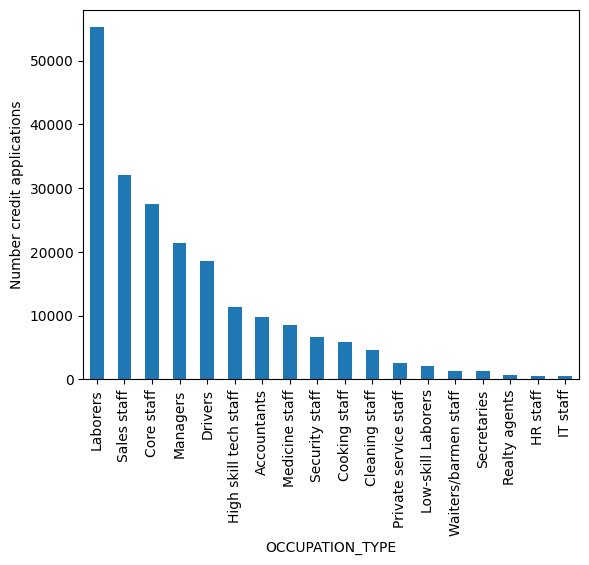

In [32]:
# let's inspect the number of observations per category


train['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Number credit applications')

In [33]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

train['OCCUPATION_TYPE'].fillna('Missing', inplace=True)
test['OCCUPATION_TYPE'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number credit applications')

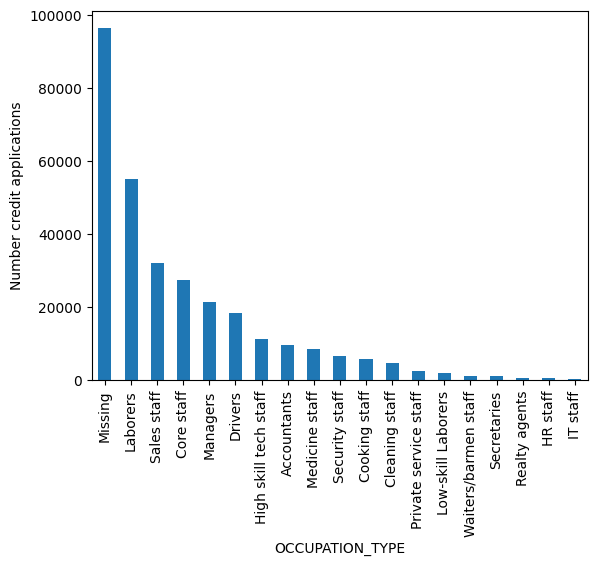

In [34]:
# let's inspect the number of observations per category


train['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Number credit applications')